In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Here we import the necessary libraries

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Here we are mounting drive to colab in order to easily access the datasets

In [ ]:
!ls "/content/gdrive/My Drive/PRML Dataset/Dataset2"
!ls "/content/gdrive/My Drive/PRML Dataset/Dataset3"

test_23.csv  test_33.csv  train_23.csv	train_33.csv
test_23.csv  train_23.csv


Checking if the mounted grive folder consists of the necessary datasets

In [ ]:
def accuracy(y_pred, y_check):
  mis = 0
  for i in range(len(y_pred)):
    if y_pred[i] != y_check[i]:
      mis += 1
  return (1 - mis/len(y_pred))

def print_arr(arr):
  for row in arr:
    for val in row:
        print(val, end=" ")
    print()

def binary_confusion_matrix(y_pred, y_check):
    t1, t2, t3, t4 = 0, 0, 0, 0
    for i in range(len(y_pred)):
        if y_pred[i] == 0 and y_check[i] == 0:
            t1 += 1
        elif y_pred[i] == 0 and y_check[i] == 1:
            t2 += 1
        elif y_pred[i] == 1 and y_check[i] == 0:
            t3 += 1
        elif y_pred[i] == 1 and y_check[i] == 1:
            t4 += 1
    return np.array([[t1, t2], [t3, t4]])

def confusion_matrix(y_pred, y_check):
    number = np.unique(np.concatenate((y_check, y_pred)))
    n_classes = len(number)
    cm = np.zeros((n_classes, n_classes),dtype = int)
    for i, label_i in enumerate(number):
        for j, label_j in enumerate(number):
            cm[i, j] = np.sum((y_check == label_i) & (y_pred == label_j))
    return cm

In [ ]:
class Bayes_covI:
    def __init__(self):
        self.n_classes = None
        self.priors = None
        self.means = None

    def fit(self, X, y):
        self.n_classes = len(np.unique(y))
        self.priors = np.zeros(self.n_classes)
        self.means = np.zeros((self.n_classes, X.shape[1]))

        for i in range(self.n_classes):
            X_i = X[y == i]
            self.priors[i] = len(X_i) / len(X)
            self.means[i] = np.mean(X_i, axis=0)

    def predict(self, X):
        y_pred = []
        for x in X:
            probs = []
            for i in range(self.n_classes):
                prior = np.log(self.priors[i])
                mean = self.means[i]
                likelihood = -(np.dot(x-mean,x-mean)/2)
                posterior = likelihood + prior
                probs.append(posterior)
            y_pred.append(np.argmax(probs))
        return np.array(y_pred)

class Bayes_covsame:
  def __init__(self):
        self.n_classes = None
        self.priors = None
        self.means = None
        self.cov = None
        self.invcov = None
  
  def fit(self, X, y):
        self.n_classes = len(np.unique(y))
        self.priors = np.zeros(self.n_classes)
        self.means = np.zeros((self.n_classes, X.shape[1]))
        self.cov = np.zeros((X.shape[1],X.shape[1]))

        for i in range(self.n_classes):
            X_i = X[y == i]
            self.priors[i] = len(X_i) / len(X)
            self.means[i] = np.mean(X_i, axis=0)
            self.cov += np.cov(X_i.T) / self.n_classes
            
        self.invcov = np.linalg.inv(self.cov)

  def predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            probs = []
            for j in range(self.n_classes):
                prior = np.log(self.priors[j])
                mean = self.means[j]
                likelihood = -0.5 * ((X[i] - self.means[j]).T @ self.invcov @ (X[i] - self.means[j]))
                posterior = likelihood + prior
                probs.append(posterior)
            y_pred.append(np.argmax(probs))
        return np.array(y_pred)

class Bayes_differentcov:
  def __init__(self):
        self.n_classes = None
        self.priors = None
        self.means = None
        self.cov = None

  def fit(self, X, y):
        self.n_classes = len(np.unique(y))
        self.priors = np.zeros(self.n_classes)
        self.means = np.zeros((self.n_classes, X.shape[1]))
        self.cov = np.zeros((self.n_classes,X.shape[1], X.shape[1]))

        for i in range(self.n_classes):
            X_i = X[y == i]
            self.priors[i] = len(X_i) / len(X)
            self.means[i] = np.mean(X_i, axis=0)
            self.cov[i] = np.cov(X_i.T)

  def predict(self, X):
        y_pred = []
        for x in X:
            probs = []
            for i in range(self.n_classes):
                prior = np.log(self.priors[i])
                mean = self.means[i]
                var = self.cov[i]
                det = np.linalg.det(var)
                inv = np.linalg.inv(var)
                likelihood = -0.5*np.log(det)- 0.5*((x - self.means[i]).T @ inv @ (x - self.means[i]))
                posterior = likelihood + prior
                probs.append(posterior)
            y_pred.append(np.argmax(probs))
        return np.array(y_pred)

This class gives the implementation of Naive Bayes using three assumptions:
 
 (1) covariance = I(identity matrix) 
 
 (2) covariance same but unknown 
 
 (3) Different covariance

In [ ]:
#Opening and storing the datasets
a_file = open("/content/gdrive/My Drive/PRML Dataset/Dataset2/train_23.csv", "r")
Input = [(line.strip()).split(',') for line in a_file]
a_file.close()
X2 = []
Y2 = []
for i in range(1, len(Input)):
  X2.append([])
  for j in range(len(Input[0]) - 1):
    X2[i-1].append(float(Input[i][j]))
  X2[i-1] = np.array(X2[i-1])
  Y2.append(int(Input[i][-1]))

X2 = np.array(X2)
Y2 = np.array(Y2)

a_file = open("/content/gdrive/My Drive/PRML Dataset/Dataset2/test_23.csv", "r")
Input = [(line.strip()).split(',') for line in a_file]
a_file.close()
Xs2 = []
Ys2 = []
for i in range(1, len(Input)):
  Xs2.append([])
  for j in range(len(Input[0]) - 1):
    Xs2[i-1].append(float(Input[i][j]))
  Xs2[i-1] = np.array(Xs2[i-1])
  Ys2.append(int(Input[i][-1]))

Xs2 = np.array(Xs2)
Ys2 = np.array(Ys2)


Opened dataset 2 and stored values in X2,Y2, Xs2 and Ys2

In [ ]:
a_file = open("/content/gdrive/My Drive/PRML Dataset/Dataset3/train_23.csv", "r")
Input = [(line.strip()).split(',') for line in a_file]
a_file.close()
X3 = []
Y3 = []
for i in range(1, len(Input)):
  X3.append([])
  for j in range(len(Input[0]) - 1):
    X3[i-1].append(float(Input[i][j]))
  X3[i-1] = np.array(X3[i-1])
  Y3.append(int(Input[i][-1]))

X3 = np.array(X3)
Y3 = np.array(Y3)

a_file = open("/content/gdrive/My Drive/PRML Dataset/Dataset3/test_23.csv", "r")
Input = [(line.strip()).split(',') for line in a_file]
a_file.close()
Xs3 = []
Ys3 = []
for i in range(1, len(Input)):
  Xs3.append([])
  for j in range(len(Input[0]) - 1):
    Xs3[i-1].append(float(Input[i][j]))
  Xs3[i-1] = np.array(Xs3[i-1])
  Ys3.append(int(Input[i][-1]))

Xs3 = np.array(Xs3)
Ys3 = np.array(Ys3)

Opened dataset 3 and stored values in X3,Y3,Xs3 and Ys3

In [ ]:
#Training of part a
#creating a model using training data and covariance = I
B1 = Bayes_covI()
B1.fit(X2,Y2)

#checking for accuracy of model on training data set
Ya_pred = B1.predict(X2)
print("Accuracy on training data on dataset2 using covariance = I is "+str(accuracy(Ya_pred,Y2)))


Accuracy on training data on dataset2 using covariance = I is 1.0


In [ ]:
#Predicting for part a
#predicting for test data using cov = I and checking for accuracy
Ysa_pred = B1.predict(Xs2)
print("Accuracy on testing data on dataset2 using covariance = I is "+str(accuracy(Ysa_pred,Ys2)))
#print(Ys_pred-Ys)

Accuracy on testing data on dataset2 using covariance = I is 0.99


The confusion matrix for training data is :


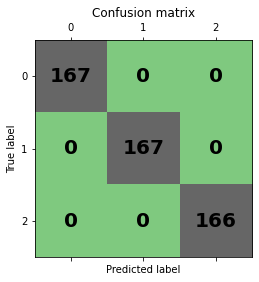


The confusion matrix for test data is :


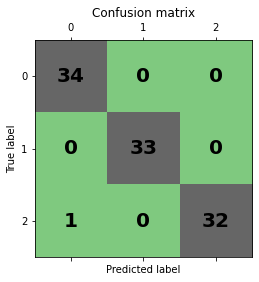

In [ ]:
#Confusion matrix for part a
cm = confusion_matrix(Ya_pred,Y2)
print("The confusion matrix for training data is :")
fig,ax = plt.subplots()
im = ax.matshow(cm,cmap='Accent')
max_v = len(cm)
for i in range(max_v):
   for j in range(max_v):
      c = cm[j, i]
      ax.text(i, j, str(c), va='center', ha='center',weight='bold',fontsize=20)
plt.title('Confusion matrix')
#plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

cm = confusion_matrix(Ysa_pred,Ys2)
print("\nThe confusion matrix for test data is :")
#print_arr(cm)
#print(cm)
#print()

fig,ax = plt.subplots()
im = ax.matshow(cm,cmap='Accent')
max_v = len(cm)
for i in range(max_v):
   for j in range(max_v):
      c = cm[j, i]
      ax.text(i, j, str(c), va='center', ha='center',weight='bold',fontsize=20)
plt.title('Confusion matrix')
#plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


PLOT :


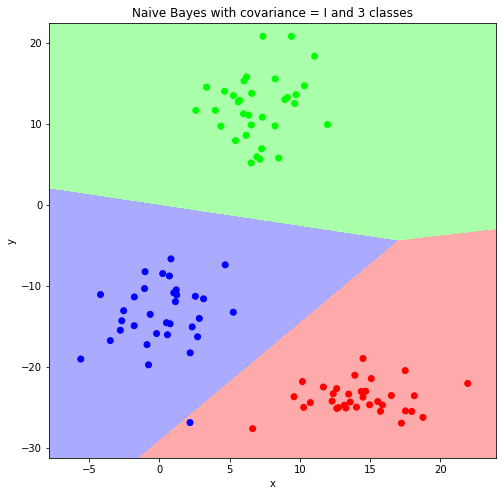

In [ ]:
#Plot for part a
h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = B1.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(Xs2[:, 0], Xs2[:, 1], c=Ys2, cmap=cmap_bold)
#plt.axis('square')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Naive Bayes with covariance = I and 3 classes")
plt.xlabel('x')
plt.ylabel('y')

print()
print("PLOT :")

plt.show()

This is the output by running bayes on dataset 2 with covariance = I

In [ ]:
#Training of part b
#creating a model using training data and covariance = I
BB1 = Bayes_covI()
BB1.fit(X3,Y3)

#checking for accuracy of model on training data set
Yb_pred = BB1.predict(X3)
print("Accuracy on training data on dataset3 using covariance = I is "+str(accuracy(Yb_pred,Y3)))


Accuracy on training data on dataset3 using covariance = I is 0.792


In [ ]:
#Predicting for part b
#predicting for test data using cov = I and checking for accuracy
Ysb_pred = BB1.predict(Xs3)
print("Accuracy on testing data on dataset3 using covariance = I is "+str(accuracy(Ysb_pred,Ys3)))
#print(Ys_pred-Ys)

Accuracy on testing data on dataset3 using covariance = I is 0.76


The confusion matrix for training data is :


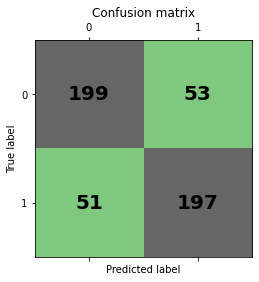


The confusion matrix for test data is :


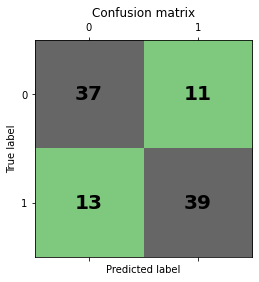

In [ ]:
#Confusion matrix for part b
cm = binary_confusion_matrix(Yb_pred,Y3)
print("The confusion matrix for training data is :")
#print_arr(cm)
#print(cm)
#print()

fig,ax = plt.subplots()
im = ax.matshow(cm,cmap='Accent')
max_v = len(cm)
for i in range(max_v):
   for j in range(max_v):
      c = cm[j, i]
      ax.text(i, j, str(c), va='center', ha='center',weight='bold',fontsize=20)
plt.title('Confusion matrix')
#plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

cm = binary_confusion_matrix(Ysb_pred,Ys3)
print("\nThe confusion matrix for test data is :")
#print_arr(cm)
#print(cm)
#print()

fig,ax = plt.subplots()
im = ax.matshow(cm,cmap='Accent')
max_v = len(cm)
for i in range(max_v):
   for j in range(max_v):
      c = cm[j, i]
      ax.text(i, j, str(c), va='center', ha='center',weight='bold',fontsize=20)
plt.title('Confusion matrix')
#plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

PLOT :


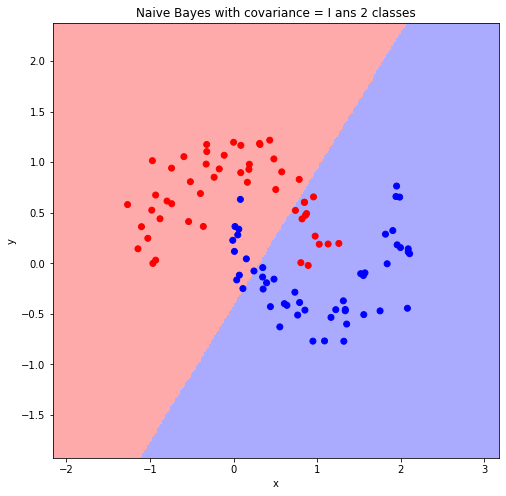

In [ ]:
#Plots for part B
h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = BB1.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(Xs3[:, 0], Xs3[:, 1], c=Ys3, cmap=cmap_bold)
#plt.axis('square')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Naive Bayes with covariance = I ans 2 classes")
plt.xlabel('x')
plt.ylabel('y')

print("PLOT :")

plt.show()

This is the output by running bayes with covariance = I on dataset 3

In [ ]:
#Training of part c
#creating a model using training data and covariance = I
B2 = Bayes_covsame()
B2.fit(X2,Y2)

#checking for accuracy of model on training data set
Yc_pred = B2.predict(X2)
print("Accuracy on training data on dataset2 using same unknown covariance is "+str(accuracy(Yc_pred,Y2)))


Accuracy on training data on dataset2 using same unknown covariance is 1.0


In [ ]:
#Predicting for part c
#predicting for test data using cov = I and checking for accuracy
Ysc_pred = B2.predict(Xs2)
print("Accuracy on testing data on dataset3 using same unknown covariance is "+str(accuracy(Ysc_pred,Ys2)))
#print(Ys_pred-Ys)

Accuracy on testing data on dataset3 using same unknown covariance is 1.0


The confusion matrix for given data is :


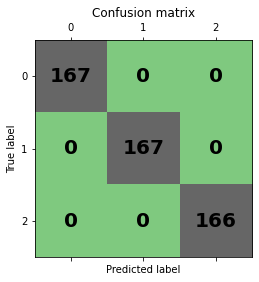


The confusion matrix for given data is :


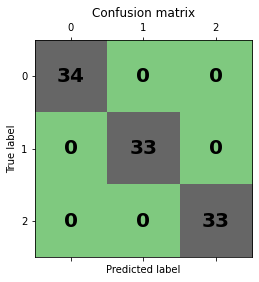

In [ ]:
#Confusion matrix for part c
cm = confusion_matrix(Yc_pred,Y2)
print("The confusion matrix for training data is :")
#print_arr(cm)
fig,ax = plt.subplots()
im = ax.matshow(cm,cmap='Accent')
max_v = len(cm)
for i in range(max_v):
   for j in range(max_v):
      c = cm[j, i]
      ax.text(i, j, str(c), va='center', ha='center',weight='bold',fontsize=20)
plt.title('Confusion matrix')
#plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

cm = confusion_matrix(Ysc_pred,Ys2)
print("\nThe confusion matrix for test data is :")
#print_arr(cm)
fig,ax = plt.subplots()
im = ax.matshow(cm,cmap='Accent')
max_v = len(cm)
for i in range(max_v):
   for j in range(max_v):
      c = cm[j, i]
      ax.text(i, j, str(c), va='center', ha='center',weight='bold',fontsize=20)
plt.title('Confusion matrix')
#plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


PLOT :


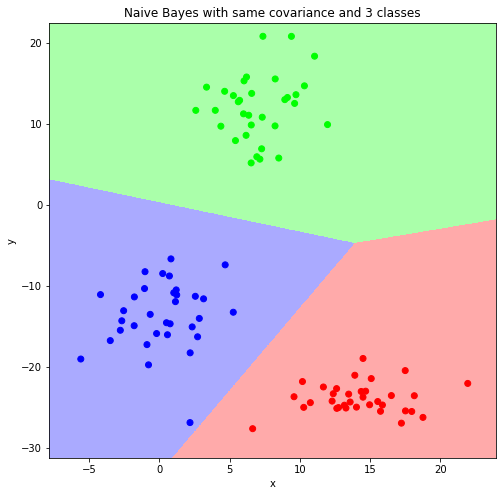

In [ ]:
#Plots for part c
h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = B2.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(Xs2[:, 0], Xs2[:, 1], c=Ys2, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Naive Bayes with same covariance and 3 classes")
plt.xlabel('x')
plt.ylabel('y')

print("PLOT :")

plt.show()

This is the output by running bayes on dataset 2 with same covariance

In [ ]:
#creating a model using training data and covariance = I
BB2 = Bayes_covsame()
BB2.fit(X3,Y3)

#checking for accuracy of model on training data set
Yd_pred = BB2.predict(X3)
print("Accuracy on training data on dataset3 using same covariance is "+str(accuracy(Yd_pred,Y3)))


Accuracy on training data on dataset3 using same covariance is 0.876


In [ ]:
#Predicting for part d
#predicting for test data using cov = I and checking for accuracy
Ysd_pred = BB2.predict(Xs3)
print("Accuracy on testing data on dataset3 using same covariance is "+str(accuracy(Ysd_pred,Ys3)))
#print(Ys_pred-Ys)

Accuracy on testing data on dataset3 using same covariance is 0.88


The confusion matrix for given data is :


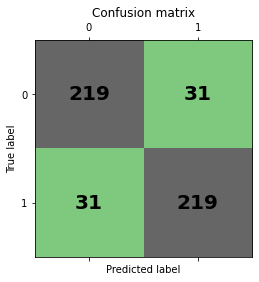


The confusion matrix for given data is :


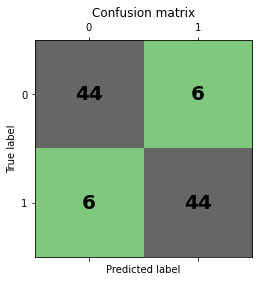

In [ ]:
#Confusion matrix for part d
cm = binary_confusion_matrix(Yd_pred,Y3)
print("The confusion matrix for given data is :")
fig,ax = plt.subplots()
im = ax.matshow(cm,cmap='Accent')
max_v = len(cm)
for i in range(max_v):
   for j in range(max_v):
      c = cm[j, i]
      ax.text(i, j, str(c), va='center', ha='center',weight='bold',fontsize=20)
plt.title('Confusion matrix')
#plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

cm = binary_confusion_matrix(Ysd_pred,Ys3)
print("\nThe confusion matrix for given data is :")
fig,ax = plt.subplots()
im = ax.matshow(cm,cmap='Accent')
max_v = len(cm)
for i in range(max_v):
   for j in range(max_v):
      c = cm[j, i]
      ax.text(i, j, str(c), va='center', ha='center',weight='bold',fontsize=20)
plt.title('Confusion matrix')
#plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

PLOT :


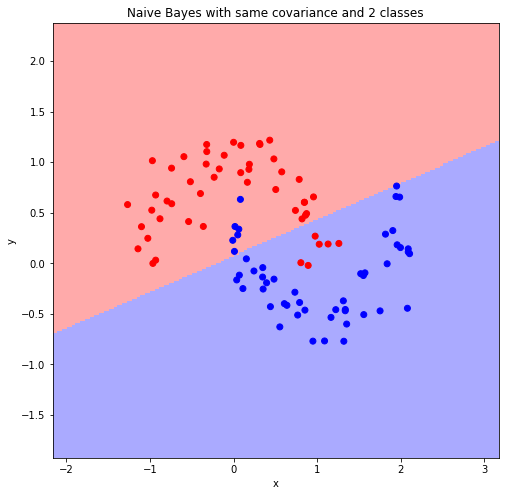

In [ ]:
#Plot for part d
h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = BB2.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(Xs3[:, 0], Xs3[:, 1], c=Ys3, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Naive Bayes with same covariance and 2 classes")
plt.xlabel('x')
plt.ylabel('y')

print("PLOT :")

plt.show()

This is the output by running bayes with same covariance on dataset 3

In [ ]:
#Training of part e
#creating a model using training data and covariance = I
B3 = Bayes_differentcov()
B3.fit(X2,Y2)

#checking for accuracy of model on training data set
Ye_pred = B3.predict(X2)
print("Accuracy on training data on dataset2 using different covariance is "+str(accuracy(Ye_pred,Y2)))


Accuracy on training data on dataset2 using different covariance is 1.0


In [ ]:
#Predicting for part e
#predicting for test data using cov = I and checking for accuracy
Yse_pred = B3.predict(Xs2)
print("Accuracy on testing data on dataset3 using different covariance is "+str(accuracy(Yse_pred,Ys2)))
#print(Ys_pred-Ys)

Accuracy on testing data on dataset3 using different covariance is 1.0


The confusion matrix for given data is :


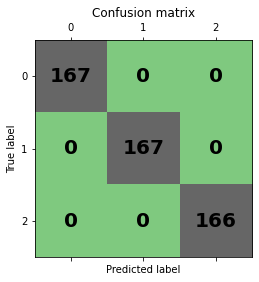


The confusion matrix for given data is :


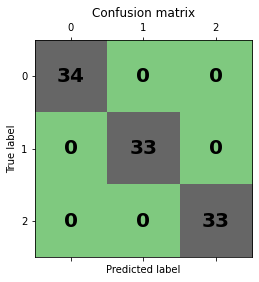

In [ ]:
#Confusion matrix and plots for part e
cm = confusion_matrix(Ye_pred,Y2)
print("The confusion matrix for given data is :")
fig,ax = plt.subplots()
im = ax.matshow(cm,cmap='Accent')
max_v = len(cm)
for i in range(max_v):
   for j in range(max_v):
      c = cm[j, i]
      ax.text(i, j, str(c), va='center', ha='center',weight='bold',fontsize=20)
plt.title('Confusion matrix')
#plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


cm = confusion_matrix(Yse_pred,Ys2)
print("\nThe confusion matrix for given data is :")
fig,ax = plt.subplots()
im = ax.matshow(cm,cmap='Accent')
max_v = len(cm)
for i in range(max_v):
   for j in range(max_v):
      c = cm[j, i]
      ax.text(i, j, str(c), va='center', ha='center',weight='bold',fontsize=20)
plt.title('Confusion matrix')
#plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

PLOT :


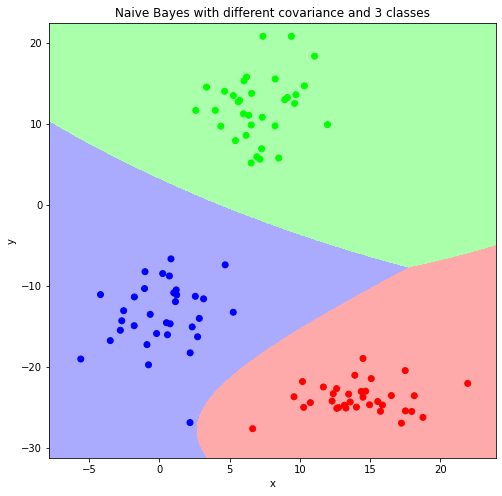

In [ ]:
#Plot for part e

h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = B3.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(Xs2[:, 0], Xs2[:, 1], c=Ys2, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Naive Bayes with different covariance and 3 classes")
plt.xlabel('x')
plt.ylabel('y')

print("PLOT :")

plt.show()

This is the output by running bayes with different covariance on dataset 2

In [ ]:
#Training of part f
#creating a model using training data and covariance = I
BB3 = Bayes_differentcov()
BB3.fit(X3,Y3)

#checking for accuracy of model on training data set
Yf_pred = BB3.predict(X3)
print("Accuracy on training data on dataset3 using same covariance is "+str(accuracy(Yf_pred,Y3)))


Accuracy on training data on dataset3 using same covariance is 0.876


In [ ]:
#Predicting for part f
#predicting for test data using cov = I and checking for accuracy
Ysf_pred = BB3.predict(Xs3)
print("Accuracy on testing data on dataset3 using different covariance is "+str(accuracy(Ysf_pred,Ys3)))
#print(Ys_pred-Ys)

Accuracy on testing data on dataset3 using different covariance is 0.87


The confusion matrix for given data is :


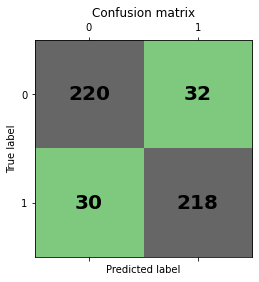


The confusion matrix for given data is :


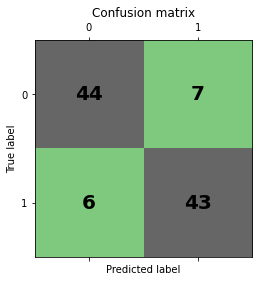

In [ ]:
#Confusion matrix for part f
cm = binary_confusion_matrix(Yf_pred,Y3)
print("The confusion matrix for given data is :")
fig,ax = plt.subplots()
im = ax.matshow(cm,cmap='Accent')
max_v = len(cm)
for i in range(max_v):
   for j in range(max_v):
      c = cm[j, i]
      ax.text(i, j, str(c), va='center', ha='center',weight='bold',fontsize=20)
plt.title('Confusion matrix')
#plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

cm = binary_confusion_matrix(Ysf_pred,Ys3)
print("\nThe confusion matrix for given data is :")
fig,ax = plt.subplots()
im = ax.matshow(cm,cmap='Accent')
max_v = len(cm)
for i in range(max_v):
   for j in range(max_v):
      c = cm[j, i]
      ax.text(i, j, str(c), va='center', ha='center',weight='bold',fontsize=20)
plt.title('Confusion matrix')
#plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

PLOT :


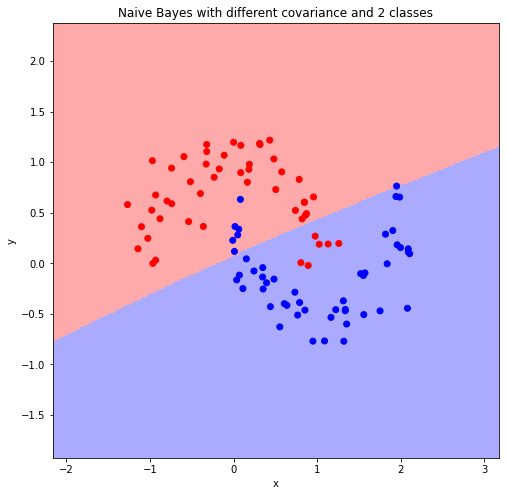

In [ ]:
#Plot for part f
h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = BB3.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(Xs3[:, 0], Xs3[:, 1], c=Ys3, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Naive Bayes with different covariance and 2 classes")
plt.xlabel('x')
plt.ylabel('y')

print("PLOT :")

plt.show()

This is the output by running bayes with different covariance on dataset 3